In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('data/Clean_Aviation.csv')

In [3]:
df.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,created_year,Total_Injuries,Total_Passengers,Make_Model
0,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,0.0,2.0,VMC,Takeoff,1982,0.0,2.0,Cessna 140
1,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,0.0,2.0,IMC,Landing,1982,0.0,2.0,Cessna 401B
2,20020917X02148,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,0.0,0.0,1.0,0.0,IMC,Cruise,1982,1.0,1.0,Bellanca 17-30A
3,20020917X02134,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,1.0,0.0,0.0,0.0,IMC,Takeoff,1982,0.0,1.0,Cessna R172K
4,20020917X02117,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,Fatal,Destroyed,Airplane,Beech,19,...,2.0,0.0,0.0,0.0,IMC,Cruise,1982,0.0,2.0,Beech 19


In [4]:
df['Event_Date'] = pd.to_datetime(df['Event_Date'])

# Extract year, month, and day
df['created_year'] = df['Event_Date'].dt.year
df['created_month'] = df['Event_Date'].dt.month
df['created_day'] = df['Event_Date'].dt.day

In [5]:
print(df[['Event_Date', 'created_year', 'created_month', 'created_day']].head())

  Event_Date  created_year  created_month  created_day
0 1982-01-01          1982              1            1
1 1982-01-01          1982              1            1
2 1982-01-02          1982              1            2
3 1982-01-02          1982              1            2
4 1982-01-02          1982              1            2


In [6]:
#find the initial year
first_year = df['created_year'].min()
first_year

1982

In [7]:
#between 1958 and 1980 : Filter accidents between 1948 and 1980
filtered_df = df[(df['created_year'] >= 1948) & (df['created_year'] <= 1980)]
# Display the filtered DataFrame
print(filtered_df[['Event_Date', 'created_year']].head(10))

Empty DataFrame
Columns: [Event_Date, created_year]
Index: []


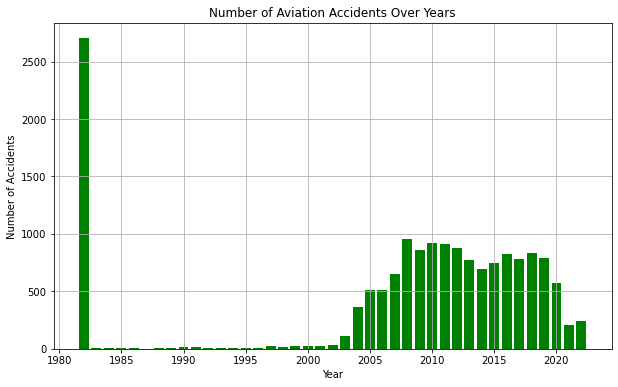

In [8]:
# Count the number of accidents per year
accidents_per_year = df['created_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Over Years')
plt.grid(True)
plt.show()

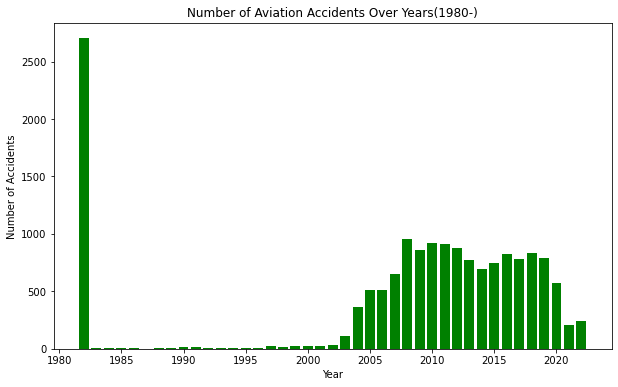

In [9]:
#filter accidents from 1980 onwards
filtered_df = df[df['created_year'] >= 1982]

# Count the number of accidents per year
accidents_per_year = filtered_df['created_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Over Years(1980-)')
#plt.grid(True)
plt.show()

## observations




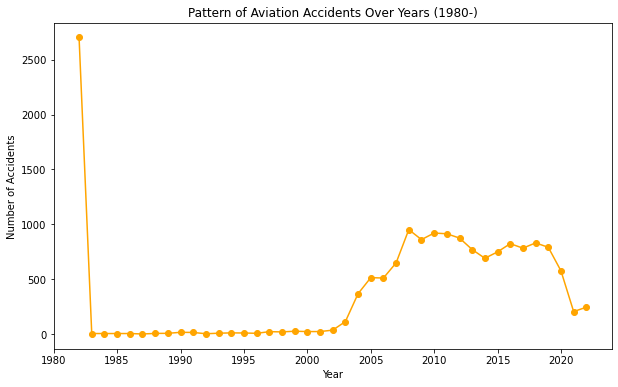

In [10]:
# Plot the data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Pattern of Aviation Accidents Over Years (1980-)')
#plt.grid(True)
plt.show()

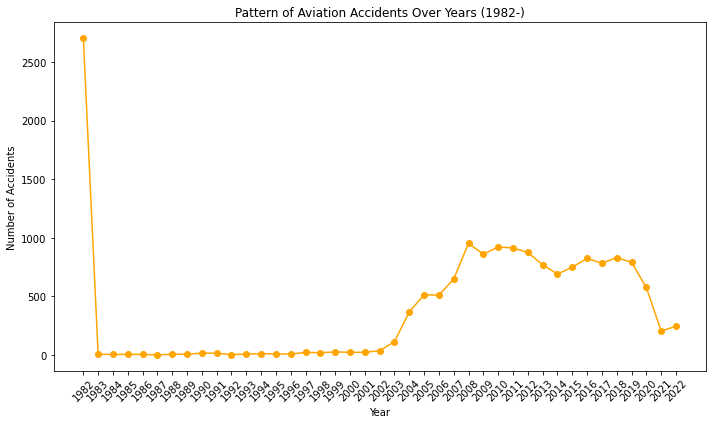

In [11]:

# Plot the data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Pattern of Aviation Accidents Over Years (1982-)')
plt.xticks(accidents_per_year.index, rotation=45)  # Adjust x-axis ticks
#plt.grid(True)
plt.tight_layout()  # To prevent clipping of labels
plt.show()

<Figure size 864x432 with 0 Axes>

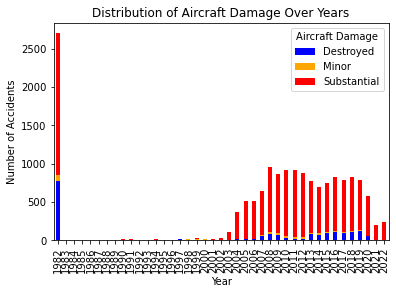

In [12]:
# Group data by year and aircraft damage
grouped_data = df.groupby(['created_year', 'Aircraft_Damage']).size().unstack()

# Plot the data as a stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange', 'red'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Aircraft Damage Over Years')
plt.legend(title='Aircraft Damage')
#plt.grid(True)
plt.show()

#make suplot 

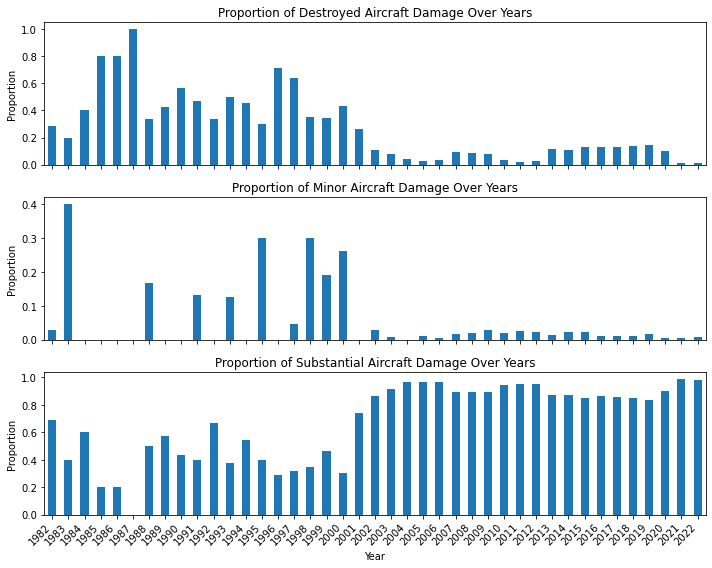

In [13]:
# Filter data for years after 1982
df_filtered = df[df['created_year'] >= 1982]

# Group data by year and calculate total accidents
total_accidents_per_year = df_filtered.groupby('created_year').size()

# Group data by year and aircraft damage, and calculate proportions
grouped_data = df_filtered.groupby(['created_year', 'Aircraft_Damage']).size().unstack()
grouped_data = grouped_data.div(total_accidents_per_year, axis=0)

# Create subplots for each aircraft damage type
damage_types = grouped_data.columns
num_damage_types = len(damage_types)

fig, axes = plt.subplots(nrows=num_damage_types, ncols=1, figsize=(10, 8), sharex=True)

for i, damage_type in enumerate(damage_types):
    ax = axes[i]
    grouped_data[damage_type].plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of {damage_type} Aircraft Damage Over Years')
    #ax.legend(title='Year', labels=grouped_data.index)
    ax.grid(False)

plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Create a contingency table
contingency_table = pd.crosstab(df['Aircraft_Damage'], 
                                 [df['Total_Fatal_Injuries'], df['Total_Serious_Injuries'], df['Total_Minor_Injuries'], df['Total_Uninjured']], 
                                 rownames=['Aircraft Damage'], colnames=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'])

print(contingency_table)

Total_Fatal_Injuries   0.0                                               ...  \
Total_Serious_Injuries  0.0                                              ...   
Total_Minor_Injuries     0.0                                             ...   
Total_Uninjured          0.0   1.0   2.0  3.0  4.0  5.0 6.0 7.0 8.0 9.0  ...   
Aircraft Damage                                                          ...   
Destroyed                  5   146    49   16    5    4   2   1   0   0  ...   
Minor                     33    53    49   32   21   13   1   6   5   3  ...   
Substantial               27  4832  3226  759  478  107  54  30  17  16  ...   

Total_Fatal_Injuries   14.0  17.0  35.0  54.0  65.0  112.0 125.0 131.0 160.0  \
Total_Serious_Injuries  0.0   0.0   0.0   21.0  0.0   0.0   44.0  0.0   4.0    
Total_Minor_Injuries     0.0   0.0   0.0   0.0   0.0   1.0   2.0   0.0   0.0   
Total_Uninjured          0.0   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   
Aircraft Damage                        

In [15]:

#contingency_table = pd.crosstab(df['Aircraft_Damage'], 
                                # [df['Total_Fatal_Injuries'], df['Total_Serious_Injuries'], df['Total_Minor_Injuries'], df['Total_Uninjured']], 
                                 #rownames=['Aircraft Damage'], colnames=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'])

# Plot the data as a stacked bar plot
#plt.figure(figsize=(10, 6))
#contingency_table.plot(kind='bar', stacked=True)
#plt.title('Relationship Between Aircraft Damage and Injury Categories')
#plt.xlabel('Aircraft Damage')
#plt.ylabel('Number of Accidents')
#plt.xticks(rotation=45, ha='right')
#plt.legend(title='Injury Categories')
#plt.tight_layout()
#plt.show()

#  Aircraft damage vs. Injuries


<Figure size 720x432 with 0 Axes>

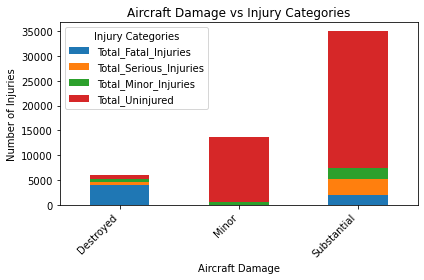

In [16]:
# Create a subset of relevant columns
subset_columns = ['Aircraft_Damage', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
df_subset = df[subset_columns]

# Group the data by 'Aircraft_Damage' and calculate the sum of injuries
grouped_data = df_subset.groupby('Aircraft_Damage').sum()

# Plot the data as a stacked bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage vs Injury Categories')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Categories')
plt.tight_layout()
plt.show()